датасет сгененрован командами:

``` python extract.py -b 34 -d 2011 2012 2013 -c all -t 5 ```

```python balance.py -b 34 -ub 5000```


In [2]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Activation

%matplotlib inline

In [3]:
df_train = pd.DataFrame(pd.read_pickle("train34bal/train.pickle"))
df_test = pd.DataFrame(pd.read_pickle("test34bal/test.pickle"))

In [4]:
df_train.head()

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [5]:
def features_to_matrix(dataset):
    pixs = dataset['features'].apply(pd.Series)
    pixs = pixs.rename(columns = lambda x: 'pix_' + str(x))
    return pixs

In [6]:
x_train = features_to_matrix(df_train[:70000])
x_test = features_to_matrix(df_test)
x_train = pd.concat([x_train, features_to_matrix(df_train[70000:])], axis=0)
x_train.shape

(516072, 1156)

In [7]:
y_test = df_test['label']
y_test = y_test.apply(pd.Series)
y_test = y_test.rename(columns = lambda x: 'class_' + str(x))

In [8]:
y_train = df_train['label']
y_train = y_train.apply(pd.Series)
y_train = y_train.rename(columns = lambda x: 'class_' + str(x))
y_train.shape

(516072, 101)

In [9]:
x_reshaped = x_train.values.reshape((x_train.shape[0], 34, 34, 1))
x_test_reshaped = x_test.values.reshape(x_test.shape[0], 34, 34, 1)

In [10]:
hidden_size = 50
classes_num = y_train.shape[1]
classes_num

101

In [11]:
model = Sequential()
model.add(Conv2D(7, kernel_size=7, input_shape=(34,34,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(22, kernel_size=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [12]:
optimazer = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(x_reshaped, y_train, batch_size=128, validation_split=0.2, epochs=13)

Train on 412857 samples, validate on 103215 samples
Epoch 1/13
412857/412857 [==============================] - 81s 196us/step - loss: 0.7126 - accuracy: 0.7905 - val_loss: 0.4432 - val_accuracy: 0.8610
Epoch 2/13
412857/412857 [==============================] - 83s 200us/step - loss: 0.3712 - accuracy: 0.8796 - val_loss: 0.3317 - val_accuracy: 0.8921
Epoch 3/13
412857/412857 [==============================] - 82s 199us/step - loss: 0.2890 - accuracy: 0.9034 - val_loss: 0.2762 - val_accuracy: 0.9093
Epoch 4/13
412857/412857 [==============================] - 84s 203us/step - loss: 0.2407 - accuracy: 0.9189 - val_loss: 0.2443 - val_accuracy: 0.9193
Epoch 5/13
412857/412857 [==============================] - 85s 206us/step - loss: 0.2107 - accuracy: 0.9278 - val_loss: 0.2210 - val_accuracy: 0.9264
Epoch 6/13
412857/412857 [==============================] - 84s 202us/step - loss: 0.1887 - accuracy: 0.9350 - val_loss: 0.2054 - val_accuracy: 0.9315
Epoch 7/13
412857/412857 [================

In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

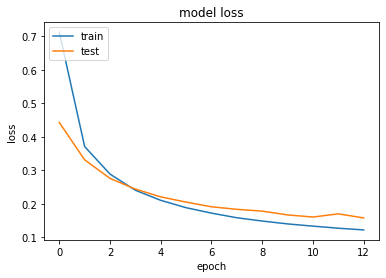

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

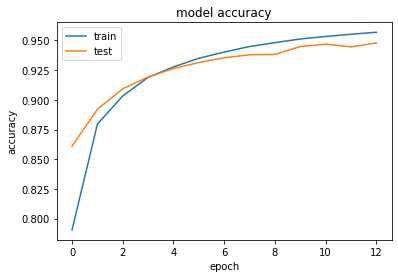

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11576/11576 [==============================] - 1s 63us/step


(0.845077543400367, 0.8487387895584106)

In [19]:
model = Sequential()
model.add(Conv2D(7, kernel_size=7, input_shape=(34,34,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(22, kernel_size=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [20]:
optimazer = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_reshaped, y_train, batch_size=128, epochs=14)

Epoch 1/14
516072/516072 [==============================] - 94s 182us/step - loss: 0.6999 - accuracy: 0.7937
Epoch 2/14
516072/516072 [==============================] - 94s 182us/step - loss: 0.3533 - accuracy: 0.8845
Epoch 3/14
516072/516072 [==============================] - 92s 178us/step - loss: 0.2741 - accuracy: 0.9080
Epoch 4/14
516072/516072 [==============================] - 95s 184us/step - loss: 0.2301 - accuracy: 0.9217
Epoch 5/14
516072/516072 [==============================] - 95s 184us/step - loss: 0.2009 - accuracy: 0.9310
Epoch 6/14
516072/516072 [==============================] - 95s 184us/step - loss: 0.1808 - accuracy: 0.9379s - loss: 0.180
Epoch 7/14
516072/516072 [==============================] - 97s 187us/step - loss: 0.1656 - accuracy: 0.9429
Epoch 8/14
516072/516072 [==============================] - 93s 181us/step - loss: 0.1543 - accuracy: 0.9463s - l
Epoch 9/14
516072/516072 [==============================] - 97s 188us/step - loss: 0.1447 - accuracy: 0.9496

In [23]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11576/11576 [==============================] - 1s 62us/step


(0.916645372025128, 0.8410504460334778)

In [26]:
import pickle

with open('model34bal.obj', 'wb') as f:
    pickle.dump(model, f)

In [27]:
with open('model34bal.obj', 'rb') as f:
    saved_model = pickle.load(f)
    score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11576/11576 [==============================] - 1s 57us/step


(0.916645372025128, 0.8410504460334778)